# Lexical Diversity of Graded Readers
## DS 7337 - Natural Language Processing - Homework 1
### George C. Sturrock
#### January 13, 2019

#### Homework 1 Objectives
1. Install Python and NLTK
2. Implement a "Lexical Diversity" scoring routine as shown in Chapter 1 of Bird, Klein and Loper.  
3. Select three different graded readers from http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf) for lexical diversity scoring.  Explain if the results are surprising. 
4. Compare the vocabulary size of the texts.  Explain in the results are surprising.
5. Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty than either measure by itself.  

##### Import Libraries

In [17]:
import platform
import os
import sys

import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Objective 1 - Install Python and NLTK

In [18]:
print("Platform:", platform.platform())
print("Python Version:", sys.version)
print("NLTK Version:", nltk.__version__)

Platform: Linux-4.15.0-1026-gcp-x86_64-with-debian-stretch-sid
Python Version: 3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]
NLTK Version: 3.3


#### Objective 2 - Implement Lexical Diversity Scoring Routine
Two functions were created.  The "lexical_diversity" function returns a value calculated by dividing the number of distinct tokens by the total number of tokens in the supplied text.  The percentage function returns a value showing the percentage of tokens in the supplied text are accounted for by a single token.

In [19]:
#Functions for lexical diversity
def lexicalDiversity(text):
    return round(len(set(text)) / len(text), 4)

def percentage(token, text):
    return round((100 *text.count(token)) / len(text), 4)

##### Objective 3 - Select Three Graded Readers from Different Grades
For this objective, the following graders readers were selected:
1. McGuffey's First Eclectic Reader, Revised Edition
2. McGuffey's Third Eclectic Reader
3. McGuffey's Sixth Eclectic Reader

##### 3.1 - Open Readers

In [20]:
#https://www.geeksforgeeks.org/reading-writing-text-files-python/
reader1 = open("reader1.txt", "r")
reader3 = open("reader3.txt", "r")
reader6 = open("reader6.txt", "r")

##### 3.2 - Clean Reader Data

In [21]:
reader1L = list(reader1)
reader3L = list(reader3)
reader6L = list(reader6)

The functions shown below assist with cleansing the raw text files.  The "stipNewLine" function forces all text to lower case to  ensure vocabulary and lexical diversity scores are consistently and accurately evaluating words.  New line characters are also stripped.

In [22]:
#Strip New Line Characters
def stripNewLine(text):
    strip = list()
    for line in text:
        strip.append(line.rstrip().lower())
    return strip;

#Save cleansed file
def writeNewReader(text, filename):
    with open(filename, "w") as output:
        output.write(str(text))

The graded readers are now individually cleansed in three steps.  First, a manual effort is made to delete copyright, instructional, legal, publisher and any other data elements which are not part of the actual text.  The text is scanned visually for the actual begin and end of the text.  The index values of the beginning and ending are found and sliced out of the original text.  Next, the two aforementioned function are executed to strip new line characters and force a consistent case.

In [23]:
#Clean first graded reader
print("Reader 1 Text Starts at:", reader1L.index("McGuffey's FIRST READER.\n"))
print("Reader 1 Text Ends at:", reader1L.index("End of the Project Gutenberg EBook of McGuffey's First Eclectic Reader,\n"))
reader1L = reader1L[189:1890]

tempStrip = stripNewLine(reader1L)

writeNewReader(tempStrip, 'reader1L.txt')

Reader 1 Text Starts at: 189
Reader 1 Text Ends at: 1890


In [24]:
#Clean 3rd graded reader
print("Reader 3 Text Starts at:", reader3L.index("INTRODUCTION.\n"))
print("Reader 3 Text Ends at:", reader3L.index("End of the Project Gutenberg EBook of McGuffey's Third Eclectic Reader\n"))
reader3L = reader3L[217:4384]

tempStrip = stripNewLine(reader3L)

writeNewReader(tempStrip, 'reader3L.txt')

Reader 3 Text Starts at: 217
Reader 3 Text Ends at: 4384


In [25]:
#Clean sixth graded reader
print("Reader 6 Text Starts at:", reader6L.index("INTRODUCTION. (11)\n"))
print("Reader 6 Text Ends at:", reader6L.index("End of the Project Gutenberg EBook of McGuffey's Sixth Eclectic Reader\n"))
reader6L = reader6L[466:17211]

tempStrip = stripNewLine(reader6L)

writeNewReader(tempStrip, 'reader6L.txt')

Reader 6 Text Starts at: 466
Reader 6 Text Ends at: 17211


##### 3.3 Convert to NLTK Format
The cleansed files will be opened for input and converted to NLTK format for analysis.  The "toNLTK" function converts the cleansed text file into NLTK format by tokenizing the text and removing punctuation.

In [26]:
#Function to convert .txt file to lists and NLTK format
#Credit to:
#https://stackoverflow.com/questions/10467024/how-do-i-create-my-own-nltk-text-from-a-text-file
#https://machinelearningmastery.com/clean-text-machine-learning-python/

table = str.maketrans('', '', string.punctuation)

def toNLTK(textIn):
    raw = nltk.word_tokenize(textIn.read())
    punc = [r.translate(table) for r in raw]
    rnltk = nltk.Text(punc)
    return rnltk;

The cleansed files from section 2.2 are opened and processed with the "toNLTK" function.

In [27]:
#open and convert to NLTK
reader1b = open("reader1L.txt", "r")
reader3b = open("reader3L.txt", "r")
reader6b = open("reader6L.txt", "r")

reader1NLTK = toNLTK(reader1b)
reader3NLTK = toNLTK(reader3b)
reader6NLTK = toNLTK(reader6b)

##### 3.4 Lexical Diversity of the Three Graded Readers
Prior to running this analysis my assumption would have been the lexical diversity would have mirrored complexity of the document.  In other words, Grader Reader 1 would have been the least diverse, and Grader Reader 6 would have been the most diverse.  The actual lexical diversity results suggest there is no correlation between lexical diversity and the text grade of these three works.  Graded Reader 3 has the best lexical diversity score of the three texts.  Graded Reader 6 has the lowest score.  It is important to realize the lexical diversity calculation has little to do with the complexity of the verbiage in the text.  Repetitive use of highly advanced words produces a low lexical diversity score when compared to utlizing a variety simple words and their synonyms.   

In [28]:
print("Lexical Diversity of Graded Reader 1:", lexicalDiversity(reader1NLTK))
print("Lexical Diversity of Graded Reader 3:", lexicalDiversity(reader3NLTK))
print("Lexical Diversity of Graded Reader 6:", lexicalDiversity(reader6NLTK))

Lexical Diversity of Graded Reader 1: 0.079
Lexical Diversity of Graded Reader 3: 0.0829
Lexical Diversity of Graded Reader 6: 0.0716


#### Objective 4 - Vocabulary Size
The graded reader level and the vocabulary size appears to be correlated.  As the graded reader level increases, the total number of words, or tokens, increases.  In this example the number of distinct words increased as the graded reader level increased as well.  This result is not surprising.  There was a visible difference in the raw length and file sizes of the Graded Readers with reader 1 being the shortest document and smallest file and reader 6 being the longest document and largest file.  

In [29]:
print("Total Number of Tokens in Graded Reader 1:", len(reader1NLTK))
print("Total Number of Tokens in Graded Reader 3:", len(reader3NLTK))
print("Total Number of Tokens in Graded Reader 6:", len(reader6NLTK))

Total Number of Tokens in Graded Reader 1: 12131
Total Number of Tokens in Graded Reader 3: 42086
Total Number of Tokens in Graded Reader 6: 200632


In [30]:
print("Total Number of Distinct Tokens in Graded Reader 1:", len(set(reader1NLTK)))
print("Total Number of Distinct Tokens in Graded Reader 3:", len(set(reader3NLTK)))
print("Total Number of Distinct Tokens in Graded Reader 6:", len(set(reader6NLTK)))

Total Number of Distinct Tokens in Graded Reader 1: 958
Total Number of Distinct Tokens in Graded Reader 3: 3490
Total Number of Distinct Tokens in Graded Reader 6: 14360


Generate frequency distribution statistics by word length to help determine variations in word length in each graded reader.

In [31]:
fdist1 = nltk.FreqDist(len(w) for w in reader1NLTK)
fdist3 = nltk.FreqDist(len(w) for w in reader3NLTK)
fdist6 = nltk.FreqDist(len(w) for w in reader6NLTK)

#### Ojbective 5 - Measurements for Evaluating Texts
This questions asks whether the combining vocabulary size statistics with the lexical diversity score is a better measure of text difficulty as opposed to using lexical diversity on it own.  However, text difficulty is a subjective measurement.  A relatively short poem could be perceived to more difficult to read than fifty page instruction manual for a sewing machine.  Additionally, individual interest in a topic could make a difficult text seem easier than what should be less difficult text.  If we limit this question to the three graded readers presented in this study, the combination of lexical diversity and vocabulary size (total and distinct) would be a superior indicator of text difficulty.  Visual examination of the content of the three different documents clearly shows Graded Reader 6 is the more difficult text to read.  The histograms shown below also show the frequency of word length in the text.  Though the graphs look very similar, the progression from graded reader 1 to 6 shows interesting evidence which could support the assertion the increase in graded reader level is proof of increased difficulty based on visual examination.  Graded Reader 1's curve flattens after word length of 1.  Graded Reader 3's curve begins to flatten after word length of 7.  Graded Reader 6's curve begins to flatten after word length of 9.  Also, maximum word length is, respectively, 12, 15 and 17 for Graded Reader 1, 3, and 6.  Based on the evidence presented in this study and personal experience, combining lexical diversity and vocabulary size does seem to provide a better indicator of overall difficulty than lexical diversity alone.

Graded Reader 1


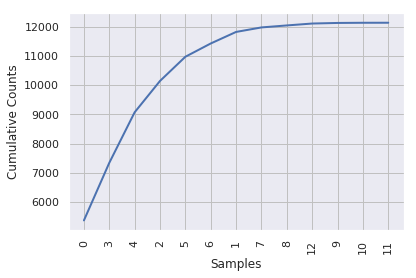

Graded Reader 3


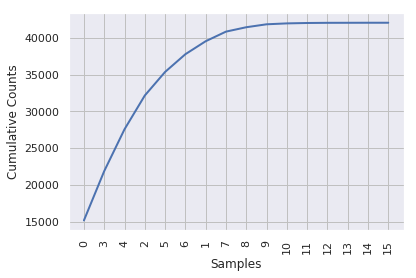

Graded Reader 6


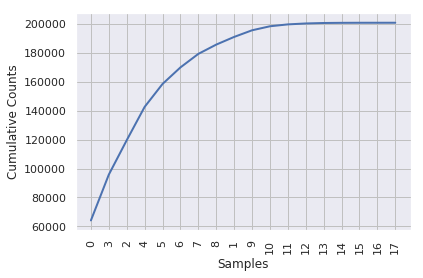

In [32]:
print("Graded Reader 1")
fdist1.plot(25, cumulative = True)
print("Graded Reader 3")
fdist3.plot(25, cumulative = True)
print("Graded Reader 6")
fdist6.plot(25, cumulative = True)